In [1]:
from lightkurve import TessTargetPixelFile
import numpy as np

%matplotlib inline

In [2]:
tpf = TessTargetPixelFile('https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_tp.fits')

In [3]:
print(tpf.mission) #mission should be Tess, id should be 261136679
print(tpf.targetid)

TESS
261136679


/Users/mikeyd1050/opt/anaconda3/lib/python3.8/site-packages/lightkurve/utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)


<AxesSubplot:title={'center':'Target ID: 261136679, Cadence: 70445'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

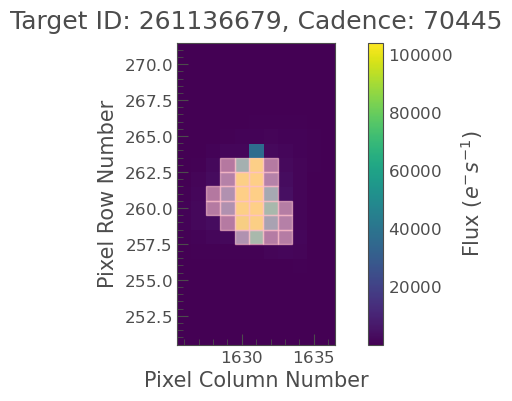

In [4]:
#plotting image with pipeline mask applied to target star
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [5]:
#use numpy to creat median image
median_image = np.nanmedian(tpf.flux, axis = 0) #axis = 0 computes over first axis

In [25]:
#selects pixels with brightness over 85th percentile
aperture_mask = median_image > np.nanpercentile(median_image, 85)
aperture_mask = tpf.create_threshold_mask(threshold = 10)

/Users/mikeyd1050/opt/anaconda3/lib/python3.8/site-packages/lightkurve/utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)


<AxesSubplot:title={'center':'Target ID: 261136679, Cadence: 70445'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

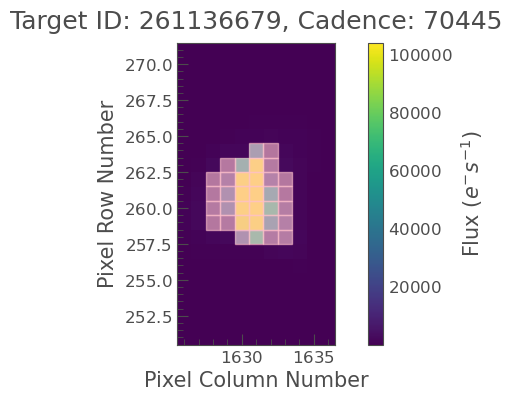

In [26]:
tpf.plot(aperture_mask = aperture_mask)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

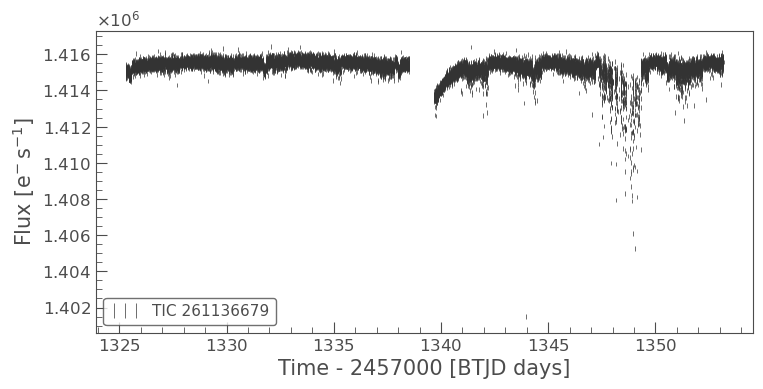

In [27]:
#extract light curve
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.errorbar()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

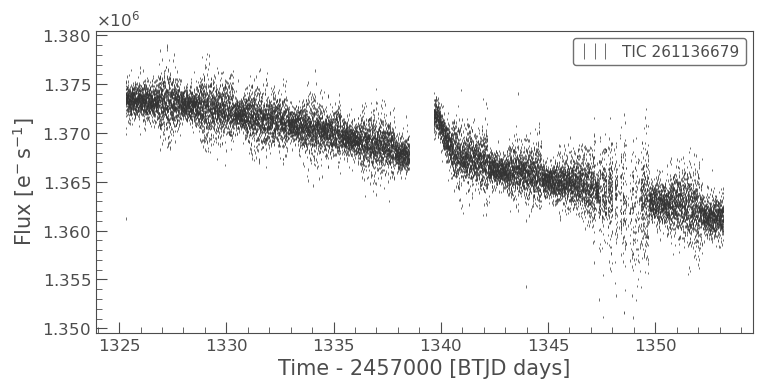

In [11]:
d_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
d_lc.errorbar()

In [17]:
m_lc = tpf.to_lightcurve(aperture_mask=median_image)
m_lc.errorbar() #why does this mask not work?
#aperture mask looks least noisy

IndexError: arrays used as indices must be of integer (or boolean) type

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

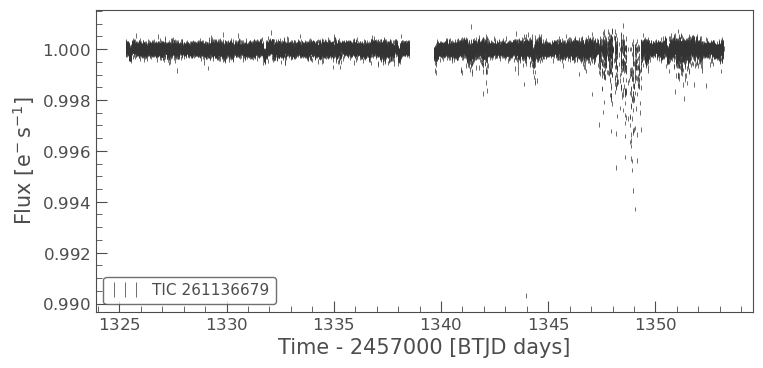

In [28]:
flat_lc = lc.flatten(window_length = 1001)
flat_lc.errorbar()

In [31]:
#flag the good quality times
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)

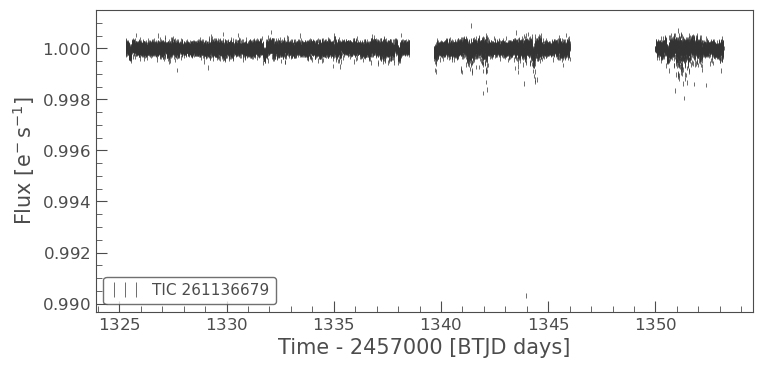

In [32]:
masked_lc = flat_lc[mask] #cuts out noisy part
masked_lc.errorbar();

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

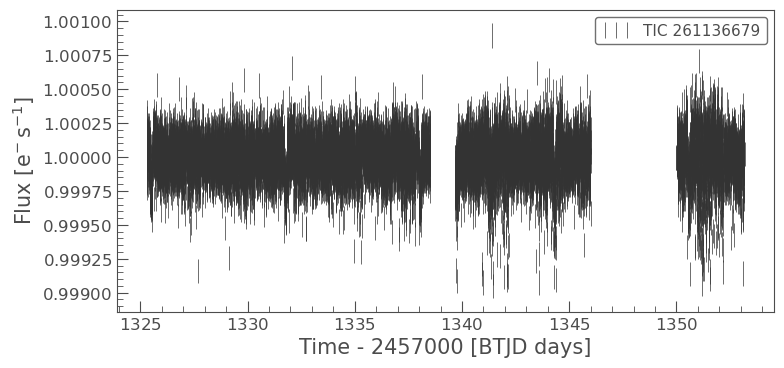

In [35]:
clipped_lc = masked_lc.remove_outliers(sigma=6) #cuts out outliers
clipped_lc.errorbar()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

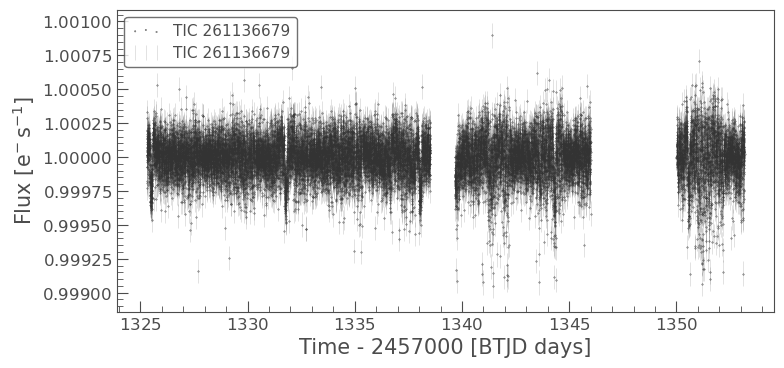

In [41]:
ax = clipped_lc.scatter(s=0.1) #creates scatter plot from light curve #add
clipped_lc.errorbar(ax=ax, alpha = 0.2) # adds errorbar


In [ ]:
huang_period = 6.27
huang_t0 = 1325.504 #could not find so estimated based on light curve

<AxesSubplot:xlabel='Phase', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

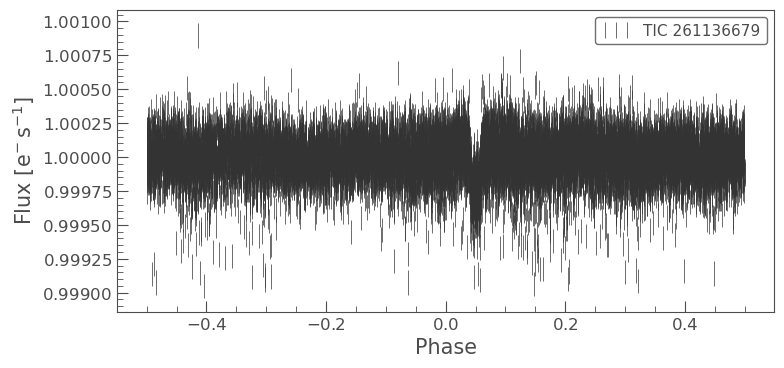

In [46]:
folded_lc = clipped_lc.fold(period=huang_period, t0 = huang_t0)
folded_lc.errorbar()

In [50]:
import astropy.units as u
binned_lc = folded_lc.bin(binsize=5*u.minute) #putting into bins of 5 mins
binned_lc.errorbar() #why doesn't work

UnitConversionError: Can only apply 'floor_divide' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

/Users/mikeyd1050/opt/anaconda3/lib/python3.8/site-packages/lightkurve/search.py:228: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn('Warning: {} files available to download. '


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

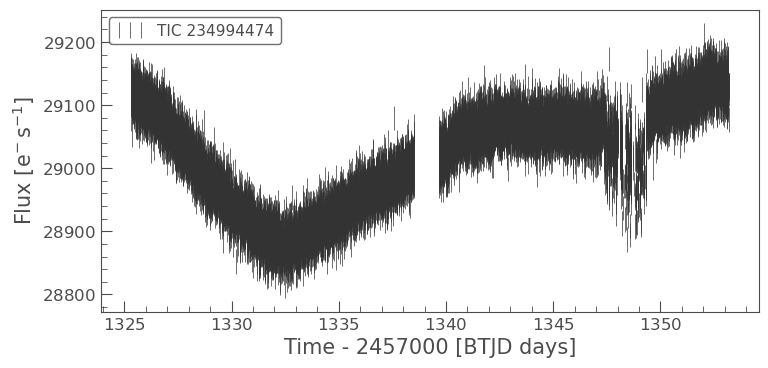

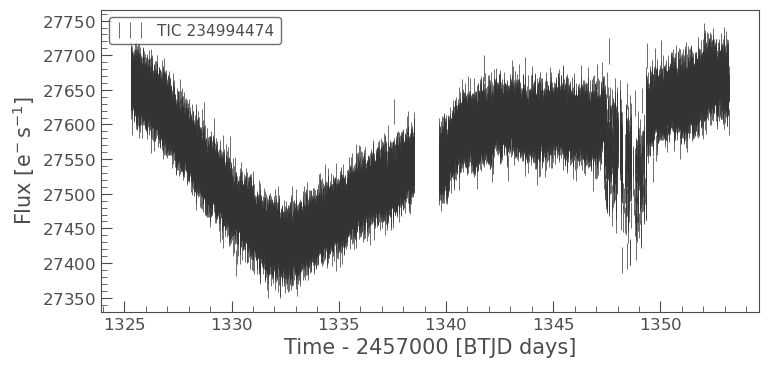

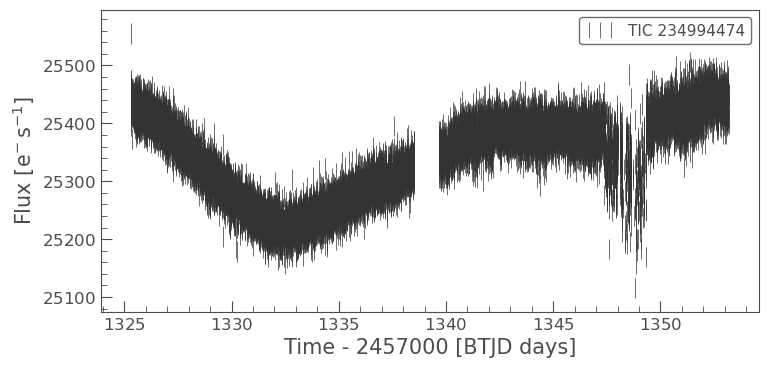

In [33]:
#Transit lightcurve of GJ 357 b
import lightkurve as lk
import numpy as np

#get tpf of GJ 357 b
tpf2 = lk.search_targetpixelfile('L 168-9 b', mission = 'TESS').download(quality_bitmask = 'default')

median_image2 = np.nanmedian(tpf2.flux, axis = 0) #axis = 0 computes over first axis
aperture_mask2 = median_image2 > np.nanpercentile(median_image2, 80) #why produces two masses in plot
aperture_mask3 = median_image2 > np.nanpercentile(median_image2, 85) #why produces two masses in plot
aperture_mask4 = median_image2 > np.nanpercentile(median_image2, 90) #why produces two masses in plot

lc2 = tpf2.to_lightcurve(aperture_mask=aperture_mask2) #can't find t0 to use to fold right
lc2.errorbar()
#80 makes best

lc3 = tpf2.to_lightcurve(aperture_mask=aperture_mask3) 
lc3.errorbar()

lc4 = tpf2.to_lightcurve(aperture_mask=aperture_mask4) 
lc4.errorbar()



